<a href="https://colab.research.google.com/github/yuri200819/-/blob/main/2020%E5%B9%B412%E6%9C%8822%E6%97%A5%E6%B1%BA%E5%AE%9A%E6%9C%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
df_train = pd.read_csv("retention_train.csv")
df_test = pd.read_csv("retention_test.csv")
df_train.head()

,v1,v2,v3,c1,c2,c3,retention
0,1900,5900,3800,0,0,1,No
1,2900,0,6600,1,0,0,Yes
2,2600,0,4100,1,0,1,Yes
3,3200,0,5100,1,0,0,Yes
4,2200,0,5600,0,0,1,No


In [4]:
x_train = df_train.drop("retention", axis=1)
y_train = df_train["retention"].map(lambda x: 1 if x =="Yes" else 0)
x_test = df_test.drop("retention", axis=1)
y_test = df_test["retention"].map(lambda x: 1 if x =="Yes" else 0)

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

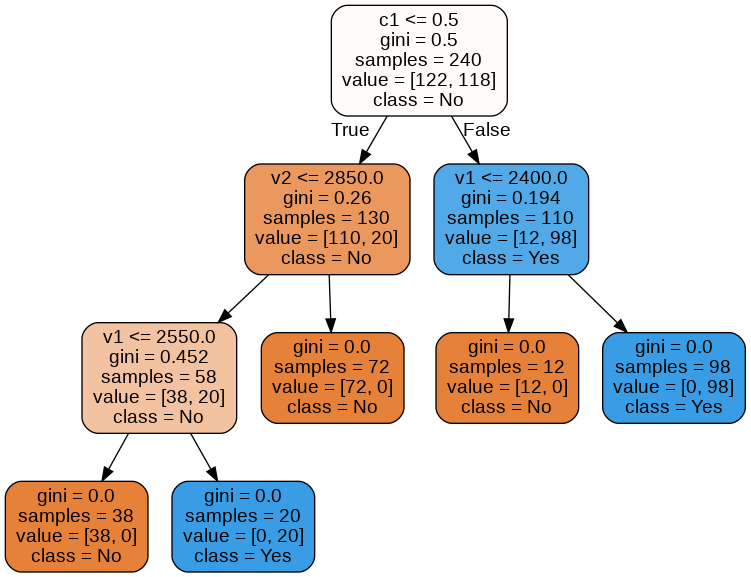

In [10]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                feature_names=x_train.columns,
                class_names=["No","Yes"],
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Text(0, 0.5, 'feature')

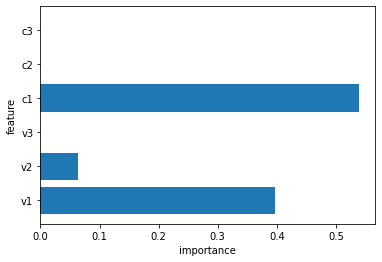

In [11]:
n_features = len(x_train.columns)
plt.barh(range(n_features), model.feature_importances_, align = "center")
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("importance")
plt.ylabel("feature")

In [12]:
#指数表記の禁止
np.set_printoptions(suppress=True)
model.predict_proba(x_test)

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.

In [13]:
model.predict(x_test)

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1])

In [14]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix =")
print(confusion_matrix(y_true = y_test,
                       y_pred = model.predict(x_test)))

confusion_matrix =
[[37  0]
 [ 1 22]]


In [15]:
print("正解率(train):{:.3f}". format(model.score(x_train, y_train)))
print("正解率(test):{:.3f}". format(model.score(x_test, y_test)))

正解率(train):1.000
正解率(test):0.983


In [16]:
from sklearn.metrics import precision_score
print("precision =",precision_score(y_true = y_test, y_pred = model.predict(x_test)))

precision = 1.0


In [17]:
from sklearn.metrics import recall_score
print("recall =",recall_score(y_true = y_test, y_pred = model.predict(x_test)))

recall = 0.9565217391304348


In [18]:
from sklearn.metrics import f1_score
print("f1 =",f1_score(y_true = y_test, y_pred = model.predict(x_test)))

f1 = 0.9777777777777777


In [19]:
from sklearn.metrics import roc_auc_score
print("auc =",roc_auc_score(y_true = y_test, y_score = model.predict_proba(x_test)[:, 1]))

auc = 0.9782608695652174


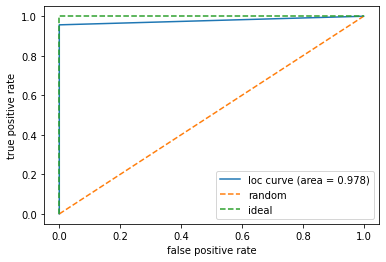

In [20]:
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

plt.plot(fpr, tpr, label="loc curve (area = %0.3f)" % auc(fpr, tpr))
plt.plot([0,1],[0,1], linestyle="--", label="random")
plt.plot([0,0,1],[0,1,1], linestyle="--", label="ideal")
plt.legend()

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [49]:
df = pd.read_csv("ram_price.csv")
df.head()

,date,price
0,1957.0,411041792.0
1,1959.0,67947725.0
2,1960.0,5242880.0
3,1965.0,2642412.0
4,1970.0,734003.0


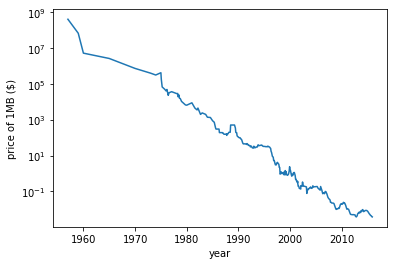

In [50]:
plt.semilogy(df["date"],df["price"])
plt.xlabel("year")
plt.ylabel("price of 1MB ($)")
plt.show()

In [53]:
x = np.array(df["date"]).reshape(-1,1)
y = np.array(df["price"])
data_train = df[df["date"]<2000]
data_test = df[df["date"]>=2000]

x_train = data_train["date"][:, np.newaxis]
y_train = np.log(data_train["price"])
x_test = data_test["date"][:, np.newaxis]
y_test = np.log(data_test["price"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  


In [54]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=1,min_samples_split=2)
model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

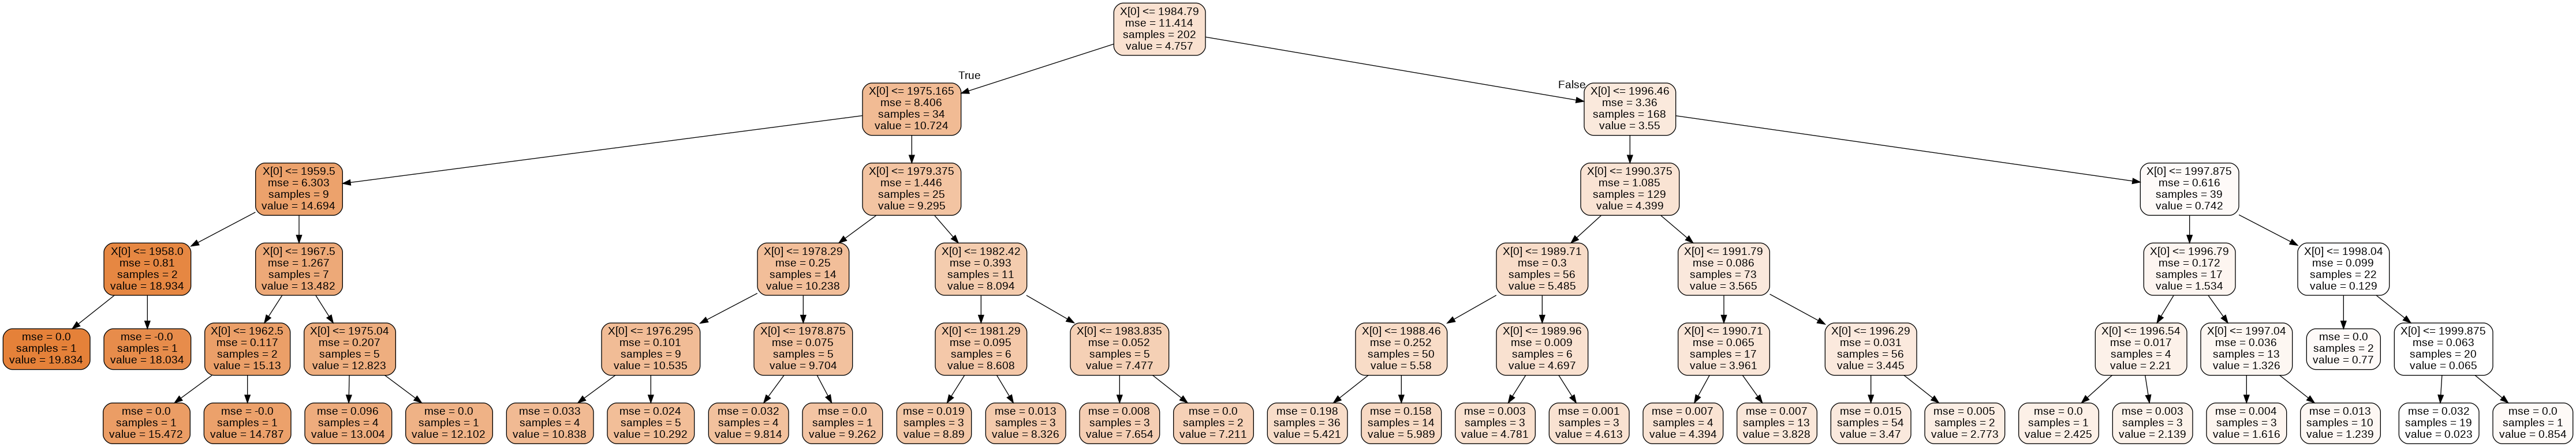

In [56]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

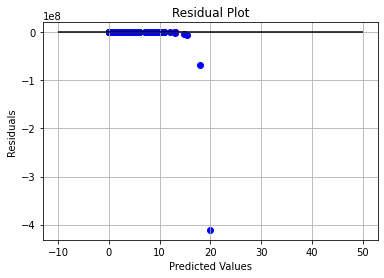

In [63]:
#残渣プロット
y_pred = model.predict(x)
plt.scatter(y_pred, y_pred - y,
            color = "blue")
plt.hlines(y = 0, xmin = -10, xmax = 50,
           color = "black")
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid()
plt.show()

In [64]:
from sklearn.metrics import  mean_squared_error
print("MSE :(train)", mean_squared_error(y_train, model.predict(x_train)))
print("MSE :(test)", mean_squared_error(y_test, model.predict(x_test)))

MSE :(train) 0.05889486924408677
MSE :(test) 18.986515228882475


In [59]:
n_features = len(x_train.columns)
plt.barh(range(n_features), model.feature_importances_, align = "center")
plt.yticks(np.arange(n_features), x_train.columns)
plt.xlabel("importance")
plt.ylabel("feature")

AttributeError: ignored

In [67]:
from sklearn.metrics import r2_score
print("r^2 train data:",r2_score(y_train, model.predict(x_train)))
print("r^2 test data:",r2_score(y_test, model.predict(x_test)))

r^2 train data: 0.9948402561218262
r^2 test data: -5.229712351825342


In [70]:
from sklearn.linear_model import  LinearRegression

In [71]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear_reg = LinearRegression().fit(x_train, y_train) 

x_all = df.date[:, np.newaxis]
pred_tree = tree.predict(x_all)
pred_lr = linear_reg.predict(x_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  after removing the cwd from sys.path.


In [ ]:
plt.semilogy(data_train.date, data_train.price, label = "train data")
plt.semilogy(data_test.date, data_test.price, label = "test data")


In [39]:
#指数表記の禁止
np.set_printoptions(suppress=True)
model.predict_proba(x_test)

array([[1.        , 0.        ],
       [0.75      , 0.25      ],
       [0.1025641 , 0.8974359 ],
       [0.75      , 0.25      ],
       [0.22222222, 0.77777778],
       [0.75      , 0.25      ],
       [0.22222222, 0.77777778],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.22222222, 0.77777778],
       [0.1025641 , 0.8974359 ],
       [0.1025641 , 0.8974359 ],
       [0.1025641 , 0.8974359 ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.1025641 , 0.8974359 ],
       [0.1025641 , 0.8974359 ],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.75      , 0.25      ],
       [0.1025641 , 0.8974359 ],
       [1.        , 0.        ],
       [0.1025641 , 0.8974359 ],
       [1.        , 0.        ],
       [0.1025641 , 0.8974359 ],
       [0.22222222, 0.77777778],
       [1.        , 0.        ],
       [0.75      , 0.25      ],
       [1.        , 0.        ],
       [0.

In [40]:
model.predict(x_test)

array([0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0])

In [41]:
from sklearn.metrics import confusion_matrix
print("confusion_matrix =")
print(confusion_matrix(y_true = y_test,
                       y_pred = model.predict(x_test)))

confusion_matrix =
[[16  3]
 [ 5 15]]


In [42]:
print("正解率(train):{:.3f}". format(model.score(x_train, y_train)))
print("正解率(test):{:.3f}". format(model.score(x_test, y_test)))

正解率(train):0.890
正解率(test):0.795


In [43]:
from sklearn.metrics import precision_score
print("precision =",precision_score(y_true = y_test, y_pred = model.predict(x_test)))

precision = 0.8333333333333334


In [44]:
from sklearn.metrics import recall_score
print("recall =",recall_score(y_true = y_test, y_pred = model.predict(x_test)))

recall = 0.75


In [45]:
from sklearn.metrics import f1_score
print("f1 =",f1_score(y_true = y_test, y_pred = model.predict(x_test)))

f1 = 0.7894736842105262


In [46]:
from sklearn.metrics import roc_auc_score
print("auc =",roc_auc_score(y_true = y_test, y_score = model.predict_proba(x_test)[:, 1]))

auc = 0.7868421052631579


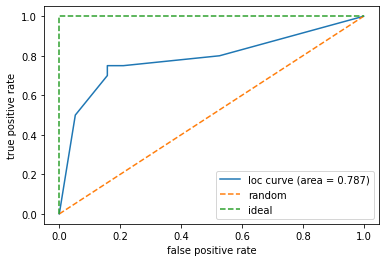

In [47]:
from sklearn.metrics import roc_curve, auc
y_score = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_score)

plt.plot(fpr, tpr, label="loc curve (area = %0.3f)" % auc(fpr, tpr))
plt.plot([0,1],[0,1], linestyle="--", label="random")
plt.plot([0,0,1],[0,1,1], linestyle="--", label="ideal")
plt.legend()

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.show()

In [ ]:
df pd.re